In [6]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import kurtosis
from scipy.stats import skew
from itertools import product, combinations
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
                #load datasets
datafile = "/content/sample_data/data.npz"
data = np.load(datafile)
train = data['train'] #2014-2018
validation = data['validation'] #2019
test = data['test'] #2020

                #create index and concatenate all sets into one
dti = pd.date_range(start='2014-01-01 00:00:00', periods=len(np.concatenate((data['train'], data['validation'], data['test']))), freq='H')
#dti
ts_complete = pd.Series(np.concatenate((data['train'], data['validation'], data['test'])), index=dti)
#ts_complete.describe(include="all")
#ts_complete.plot()

                #from pandas.series to dataframe with dti as index
ts_df= ts_complete.to_frame(name="Power")
            # duplicates and missing values
            #duplicates reported don't make sense - reported dup. values differ in index date
duplicate_rows=ts_df[ts_df.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)
#duplicate_rows example
ts_df.loc[ts_df.Power==3109.167]
#we are keeping all the "duplicates"
missing_vals=ts_df.isnull().sum()
print("number of missing values:", missing_vals)



number of duplicate rows: (18044, 1)


Power
2018-07-08 07:00:00  3109.167
2020-05-31 06:00:00  3109.167

number of missing values: Power    0
dtype: int64


Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Hourly Wind Power Data')

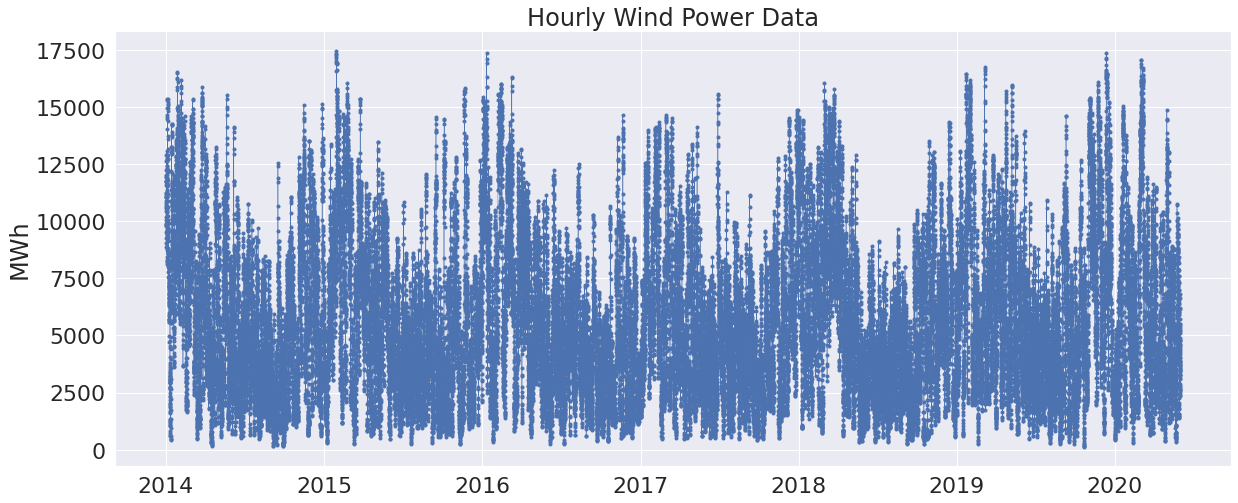

In [8]:
sns.set(rc={'figure.figsize':(20,8)},font_scale = 2)
plt.plot(ts_df['Power'], marker='.', linestyle='-', linewidth=0.5, label='Hourly')
plt.ylabel('MWh')
plt.title("Hourly Wind Power Data")

Power
count  56231.000000
mean    5634.177033
std     3317.076934
min      143.000000
25%     3023.500000
50%     4985.833000
75%     7680.250000
max    17435.833000

[]

(-800.0, 18000.0)

Text(0.5, 0, 'Wind Power (MWh)')

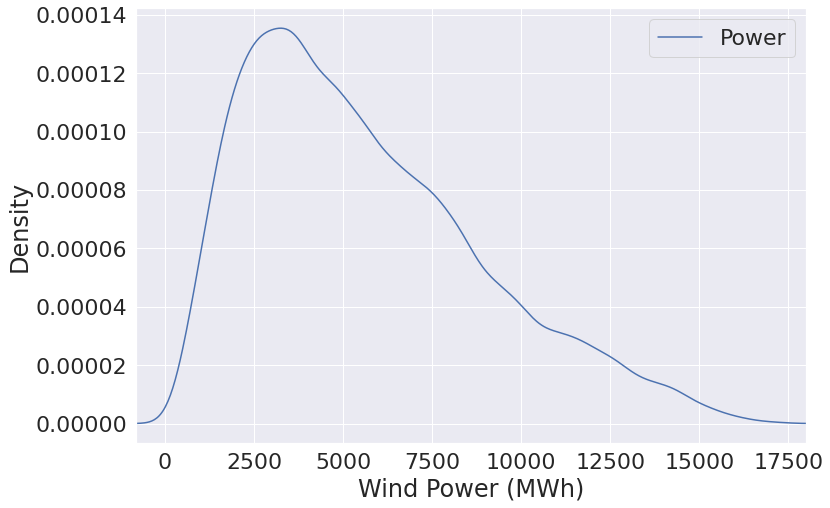

Text(0.5, 0, 'Wind Power (MWh)')

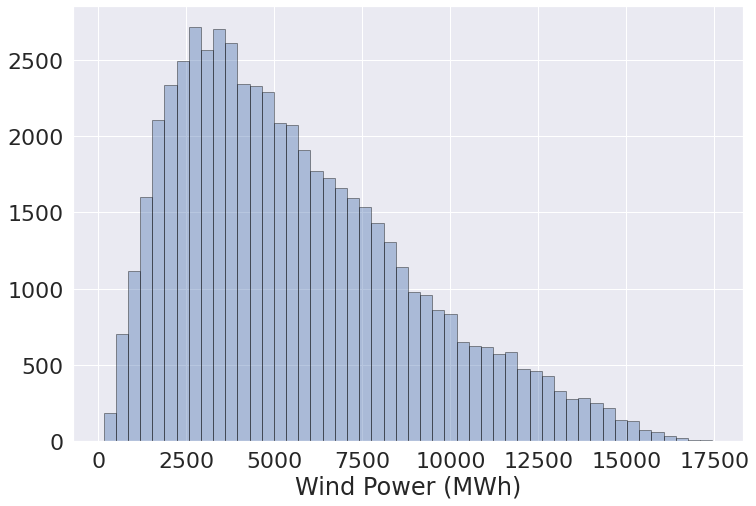

In [9]:
ts_df.describe(include='all')
sns.set(rc={'figure.figsize':(12,8)}, font_scale = 2)
x=ts_df.plot(kind='density')
# ploting the Curve 
x.plot() 
  
# Display 
plt.xlim([-800,18000])
plt.xlabel("Wind Power (MWh)")
plt.show()

sns.distplot(ts_df['Power'], hist=True, kde=False, 
             color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Wind Power (MWh)")

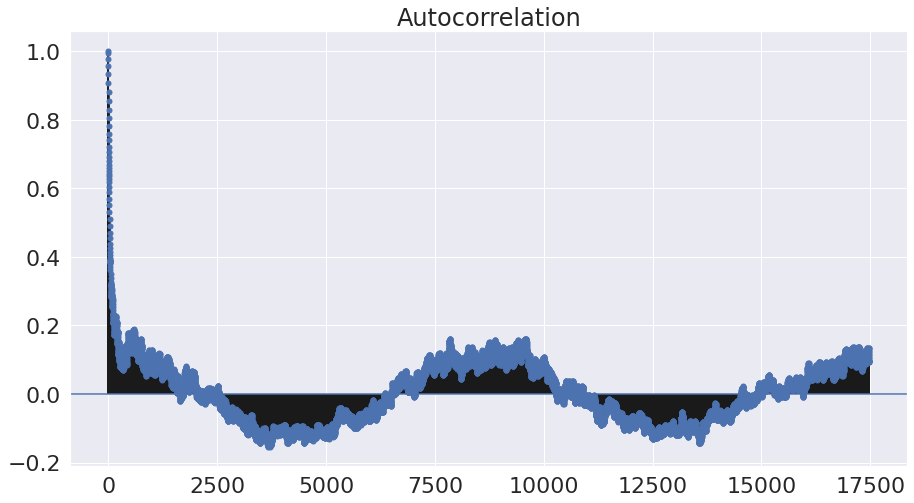

(-0.2, 0.5)

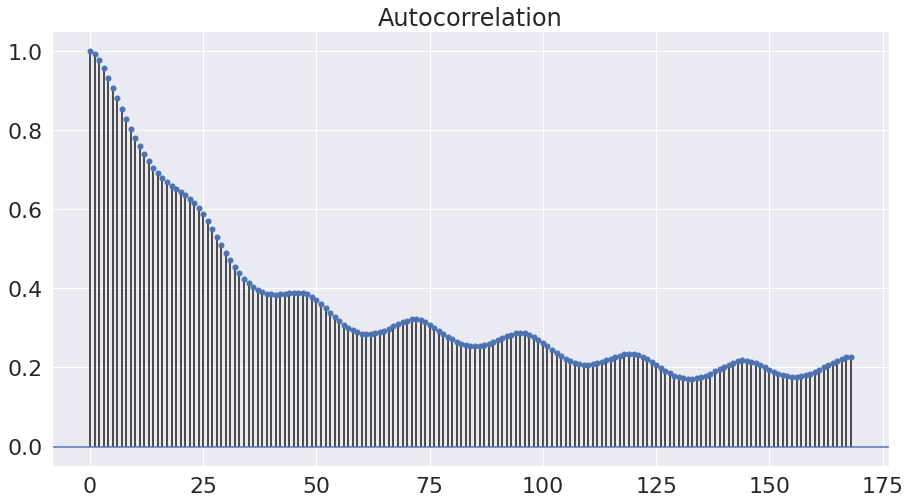

(-0.05, 0.5)

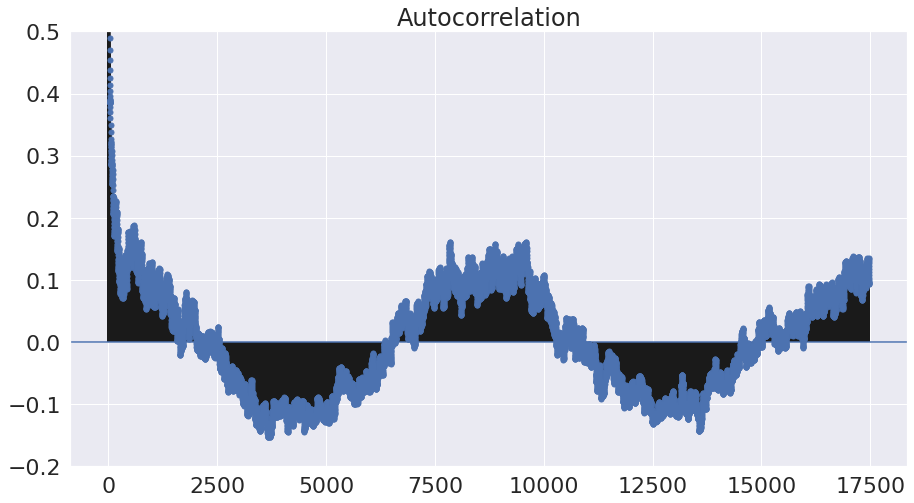

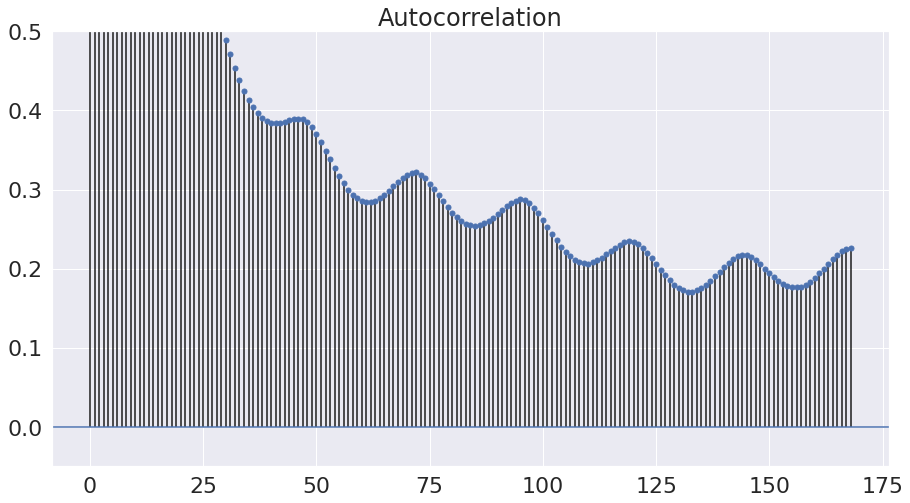

In [10]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=2)
# Creating Autocorrelation plot 
plot_acf(ts_df, lags=17472, alpha=None)
plt.ylim(-0.2, 0.5)

plot_acf(ts_df, lags=168, alpha=None)
plt.ylim(-0.05, 0.5)

In [11]:
            #dframe aggregated by monthly means
ts_month_mean=ts_df['Power'].resample('M').mean()
ts_monthly_mean= ts_month_mean.to_frame(name="Power")
#ts_monthly_mean.loc[ts_monthly_mean.index.year==2014]

            #dframe aggreagted by monthly medians
ts_month_median=ts_df['Power'].resample('M').median()
ts_monthly_median= ts_month_median.to_frame(name="Power")

            #dframe aggregated by weekly means
ts_week_mean=ts_df['Power'].resample('W').mean()
ts_weekly_mean= ts_week_mean.to_frame(name="Power")
#ts_weekly_mean.head(10)

            #dframe aggregated by day means
ts_day_mean=ts_df['Power'].resample('d').mean()
ts_daily_mean= ts_day_mean.to_frame(name="Power")
#ts_daily_mean.head(10)

            #df aggregated by annual means and medians
ts_yearly_mean=ts_df['Power'].resample('Y').mean()
#test:
#ts_df[ts_df.index.year==2014].mean()
ts_yearly_median=ts_df['Power'].resample('Y').median()

#ts_yearly_mean
#ts_yearly_median

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

[Text(0, 0.5, 'MWh')]

Text(0.5, 1.0, 'Wind Power Distribution by Year')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Hourly Wind Power, Monthly Mean & Median')

2014          2015  ...          2019          2020
Descriptive                              ...                            
count         8760.000000   8760.000000  ...   8760.000000   3647.000000
mean          5844.886208   5479.770567  ...   5979.644367   5921.034868
std           3436.382224   3233.514322  ...   3469.823273   3515.277214
min            147.833000    234.500000  ...    143.000000    315.167000
25%           3121.458250   2887.083500  ...   3239.708250   3132.583000
50%           5241.916500   4890.500000  ...   5258.750000   5190.000000
75%           8170.500000   7479.416750  ...   8113.541500   8196.000000
max          16525.500000  17435.833000  ...  17345.500000  17033.833000

[8 rows x 7 columns]

Text(0.5, 1.0, 'Density')

 Skewness Measure:  [0.7608137]
 Kurtosis Measure:  [-0.01529553]


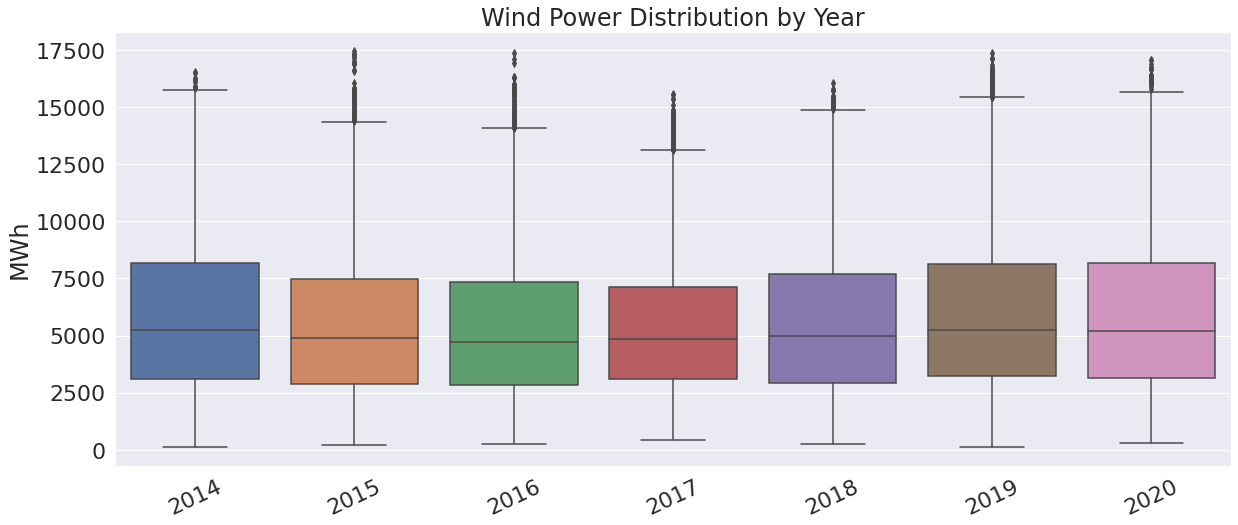

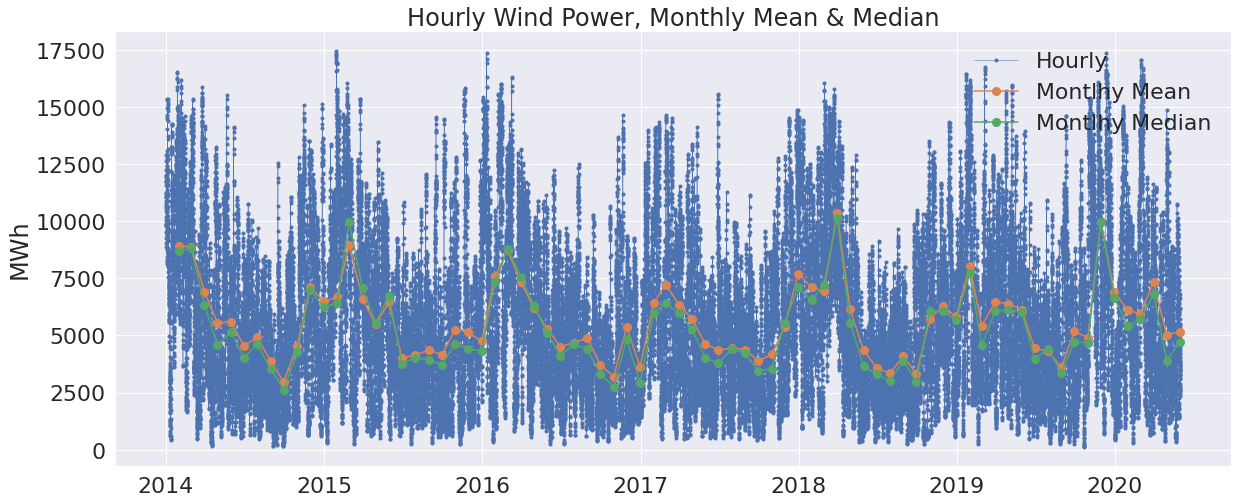

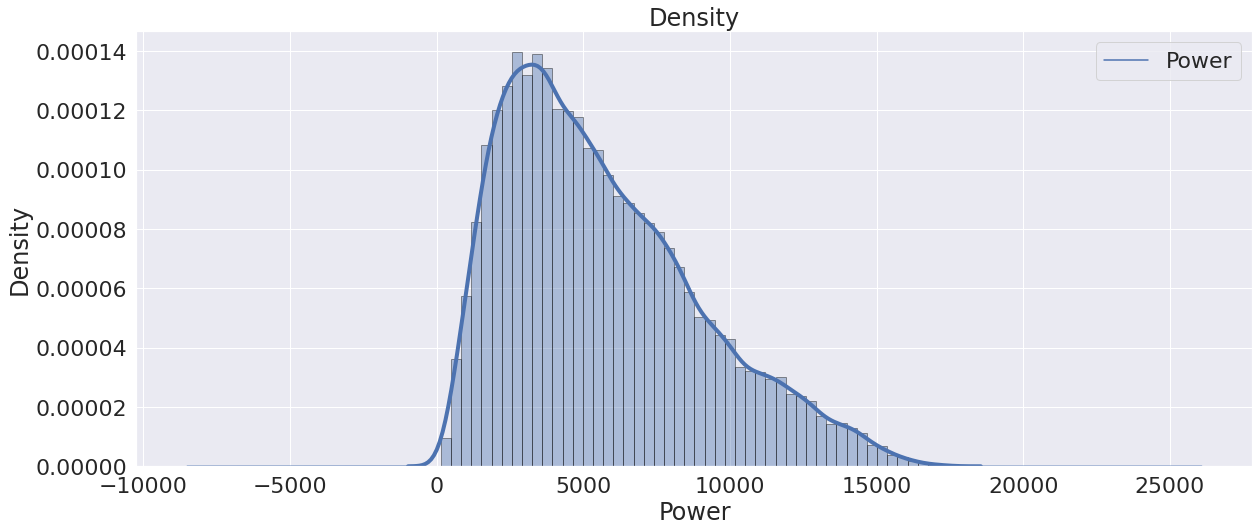

In [12]:
                ################  Distribution by Year ###################
sns.set(rc={'figure.figsize':(20,8)},font_scale = 2)
plt.xticks(rotation=25)
sns.boxplot(x=ts_df.index.year, y=ts_df["Power"]).set(ylabel='MWh')
plt.title("Wind Power Distribution by Year")

                ########## hourlys dist. by year with weekly & monthly mean##########
fig, ax=plt.subplots()
ax.plot(ts_df['Power'], marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(ts_monthly_mean['Power'],marker='o', markersize=8, linestyle='-', label='Montlhy Mean')
ax.plot(ts_monthly_median['Power'],marker='o', markersize=8, linestyle='-', label='Montlhy Median')
ax.legend(loc='upper right', frameon=False)
ax.set_ylabel('MWh')
plt.title("Hourly Wind Power, Monthly Mean & Median")

                ########## descriptive stats by year ##########
years=ts_df.index.year.unique()
dn=[]
for i in range(len(years)):
    df=ts_df.loc[ts_df.index.year==years[i]].describe(include='all')
    df.columns=[years[i]]
    df.index.name="Descriptive"
    dn.append(df)
dn=pd.concat(dn, axis=1)
#dn.reset_index()
#dn.transpose()
#dn=dn.pivot(columns=list(dn.index))
dn

                ########## dist skewness & kurt. ###############
ts_df.plot(kind='density')
plt.title("Density")
sns.set_theme();
sns.distplot(ts_df['Power'], hist=True, kde=True, 
             color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


print('\033[1m','Skewness Measure: ', skew(ts_df, bias=False))
#ts_df.skew()
print('\033[1m','Kurtosis Measure: ',kurtosis(ts_df, bias=False))
#ts_df.kurt()

#prints density by year
#years=ts_df.index.year.unique()
#for i in range(len(years)):
    #ts_df.loc[ts_df.index.year==years[i]].plot( kind='density')
    

 2014  Skewness Measure:  0.6037998722620643
 2014  Kurtosis Measure:  -0.4195949205095517


Text(0.5, 1.0, '2014')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2014')

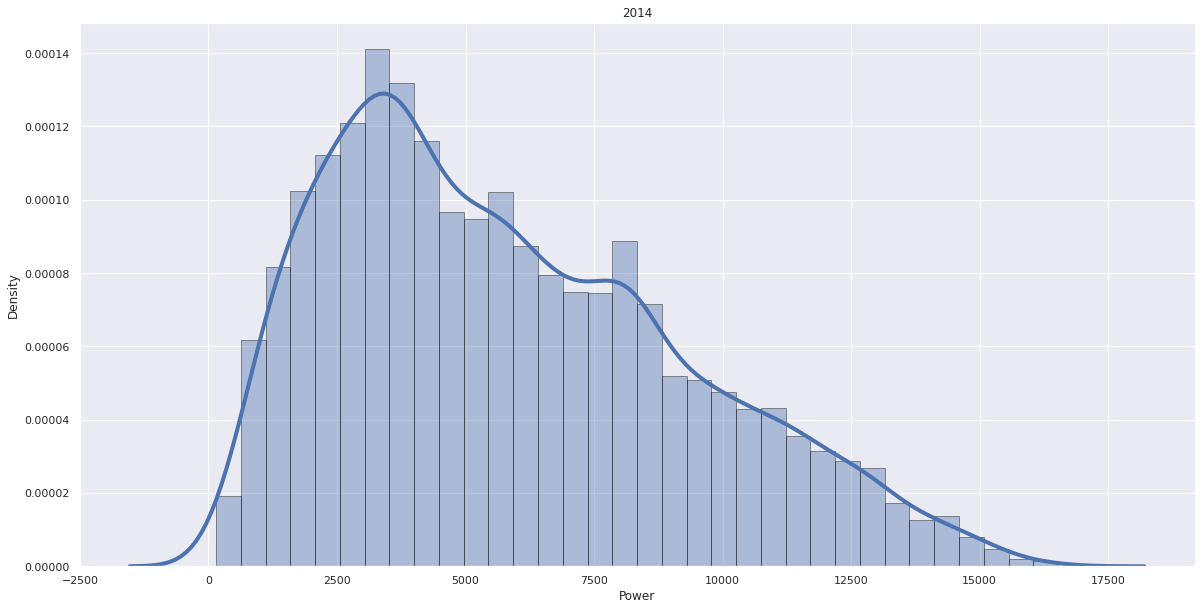

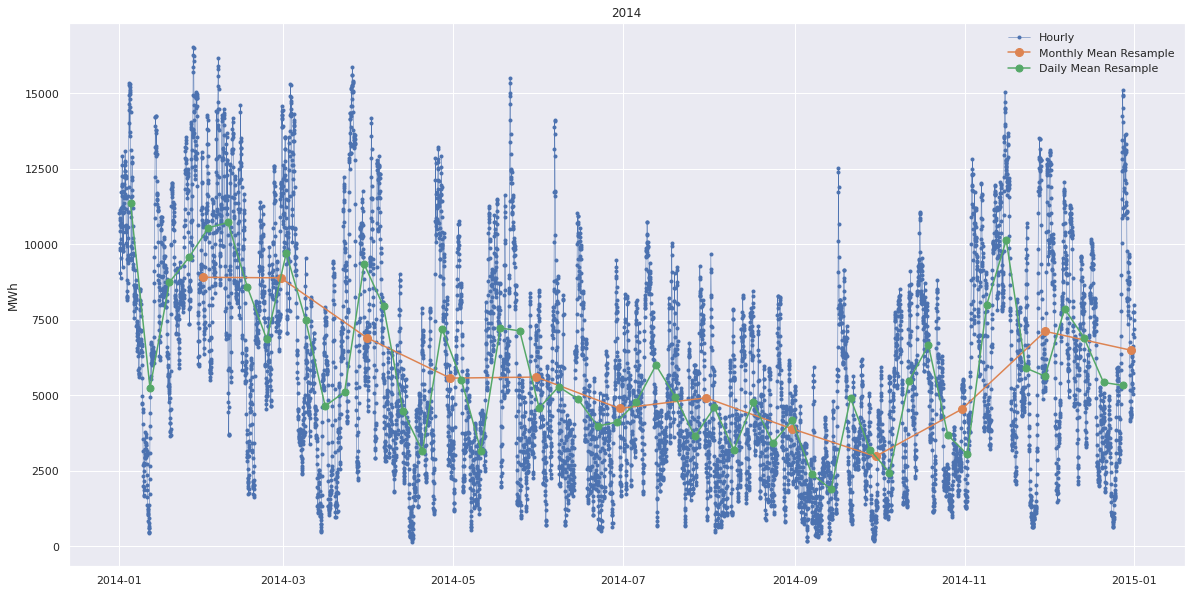

 2015  Skewness Measure:  0.7557612685725769
 2015  Kurtosis Measure:  0.04871430591279191


Text(0.5, 1.0, '2015')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2015')

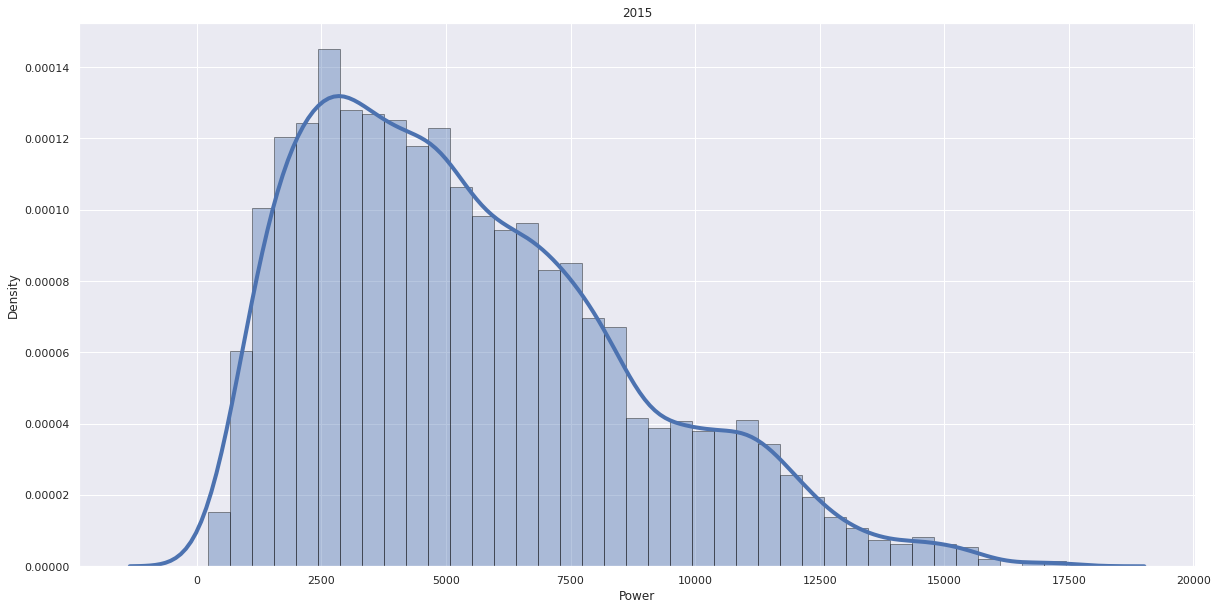

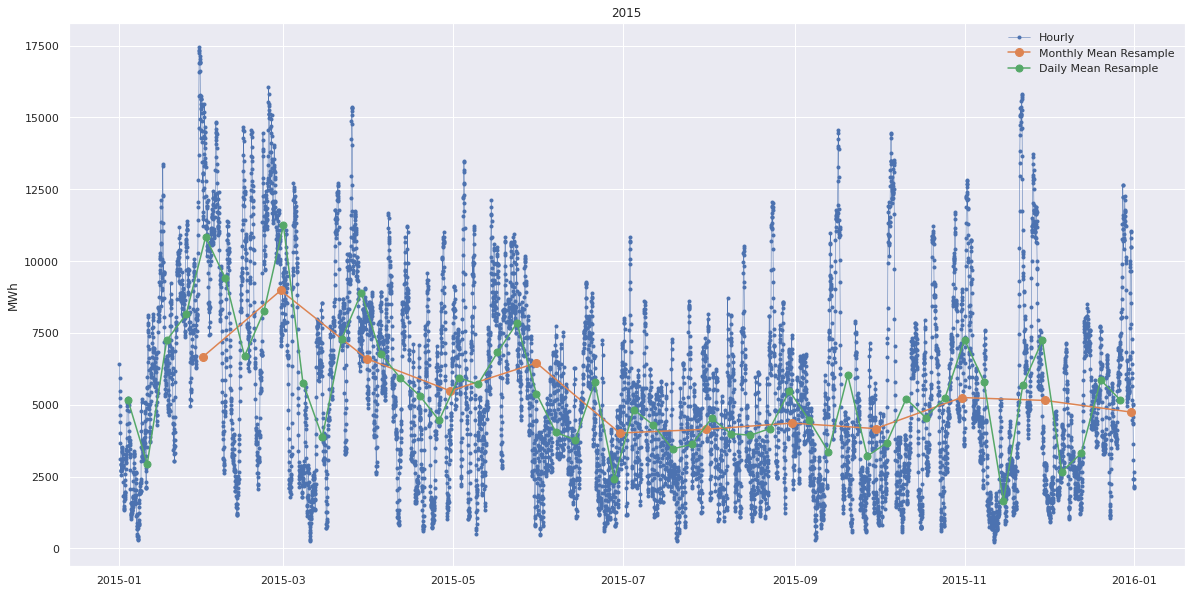

 2016  Skewness Measure:  0.8857720070007707
 2016  Kurtosis Measure:  0.2509236781220401


Text(0.5, 1.0, '2016')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2016')

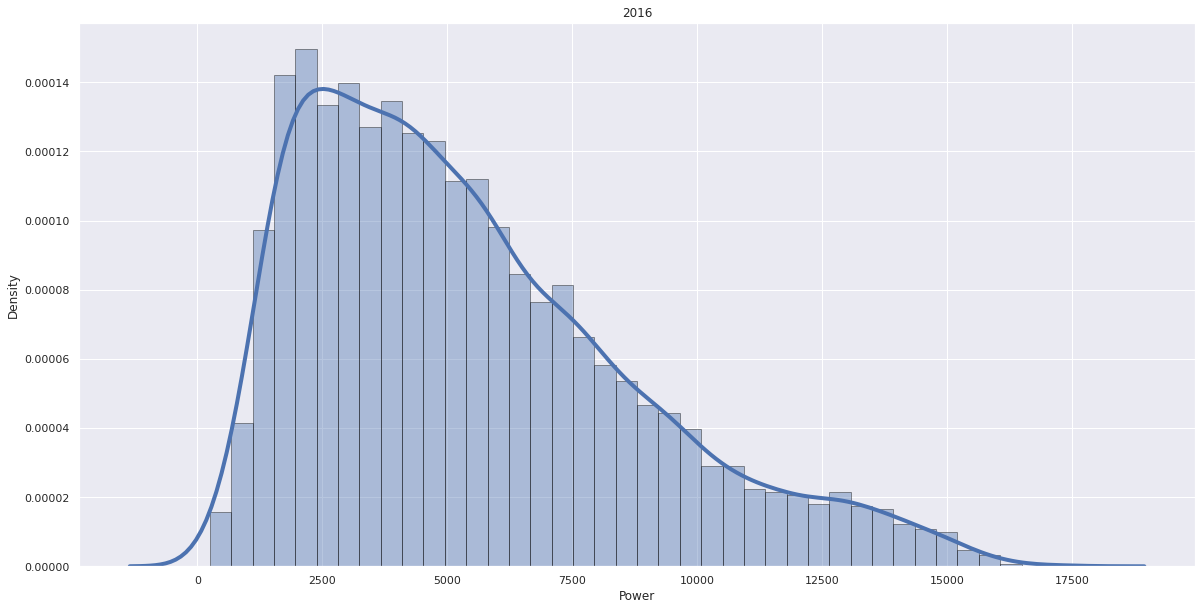

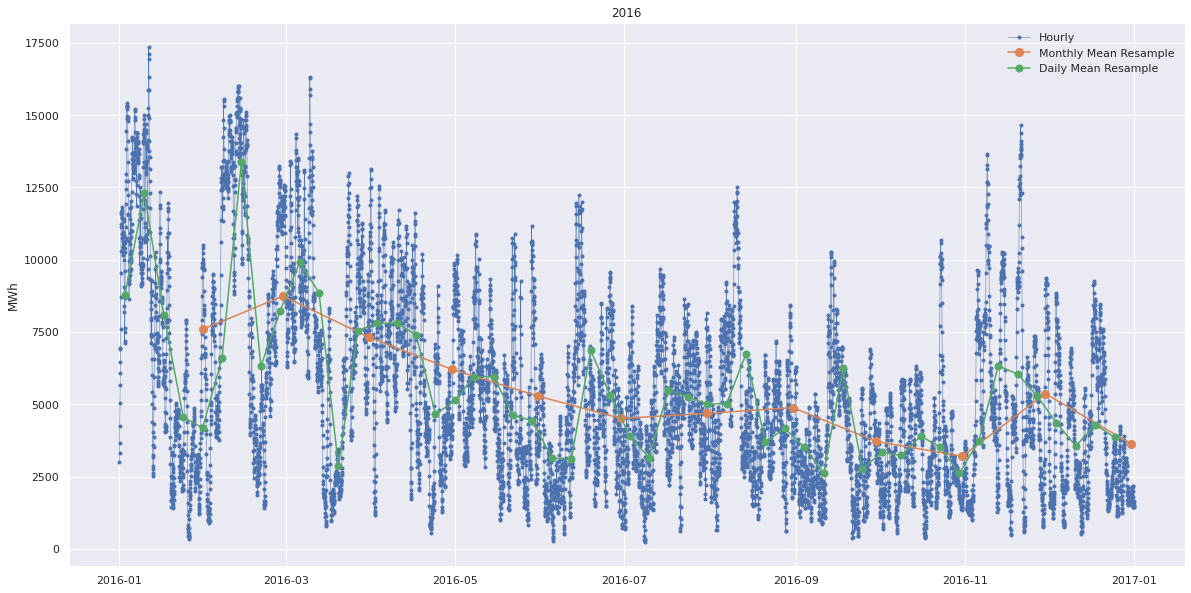

 2017  Skewness Measure:  0.8176993153471558
 2017  Kurtosis Measure:  0.17821969500690704


Text(0.5, 1.0, '2017')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2017')

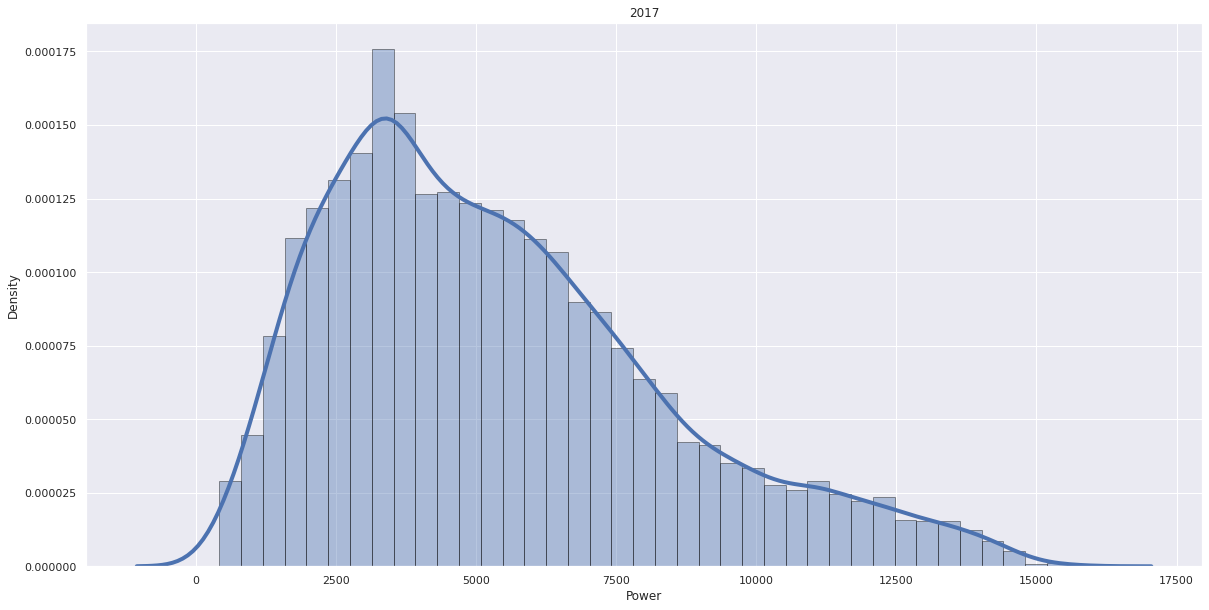

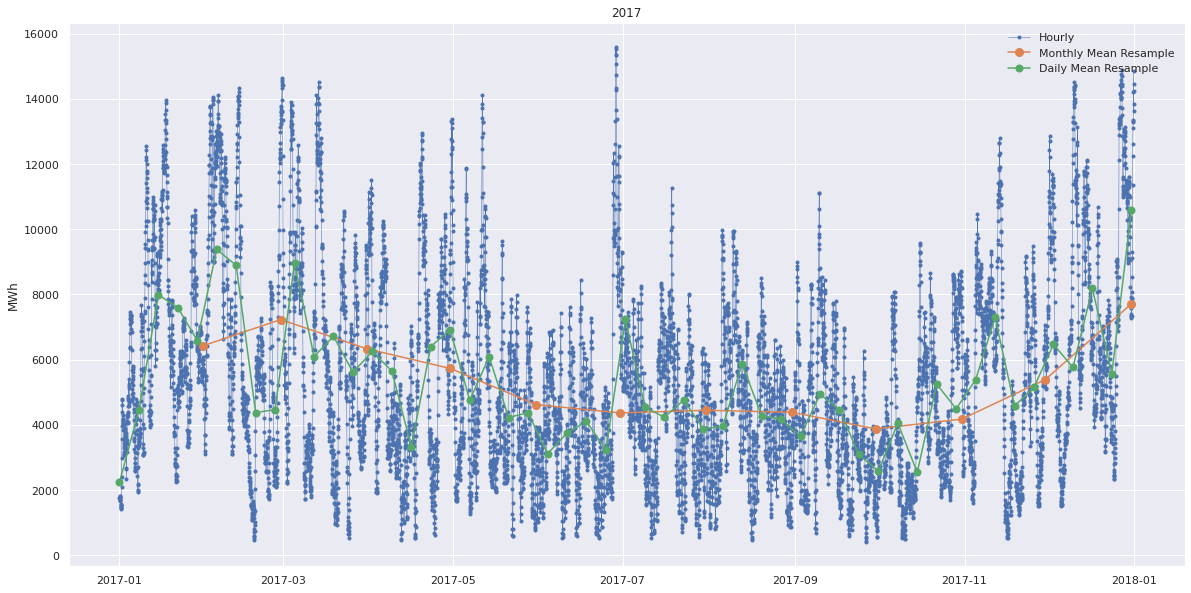

 2018  Skewness Measure:  0.6704410789494423
 2018  Kurtosis Measure:  -0.2566801709871789


Text(0.5, 1.0, '2018')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2018')

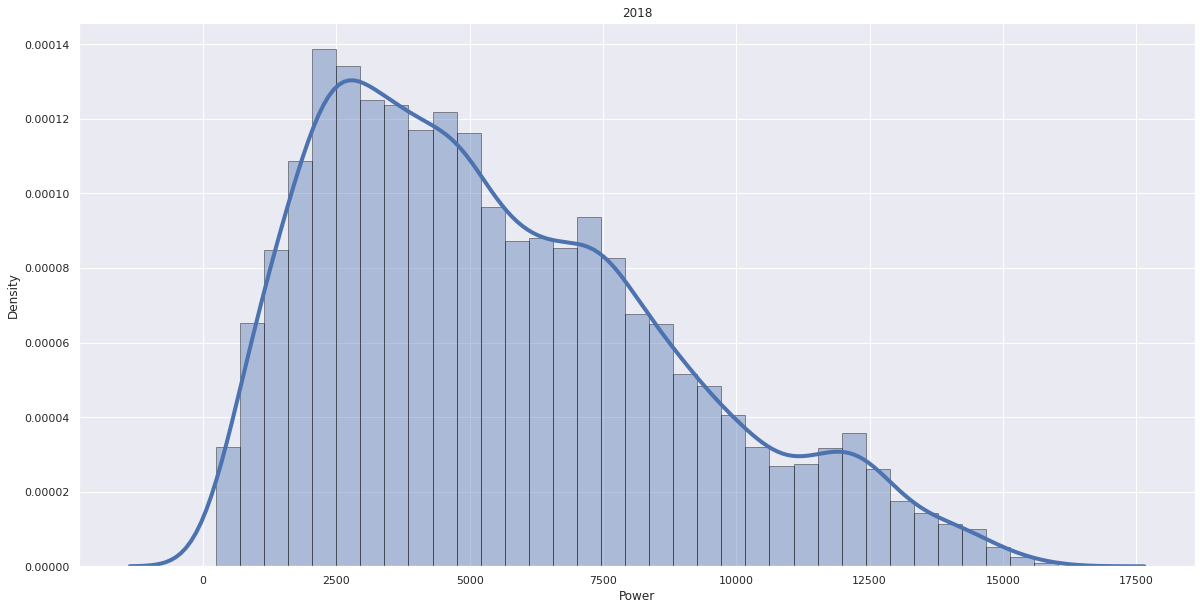

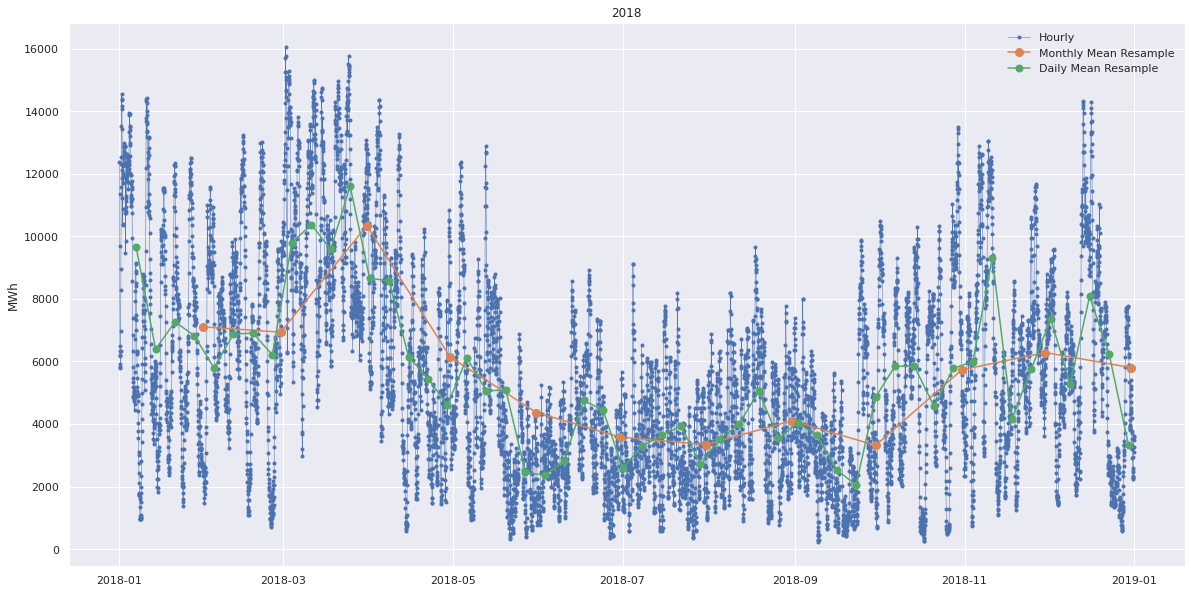

 2019  Skewness Measure:  0.7796456401991309
 2019  Kurtosis Measure:  0.008383305795586882


Text(0.5, 1.0, '2019')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2019')

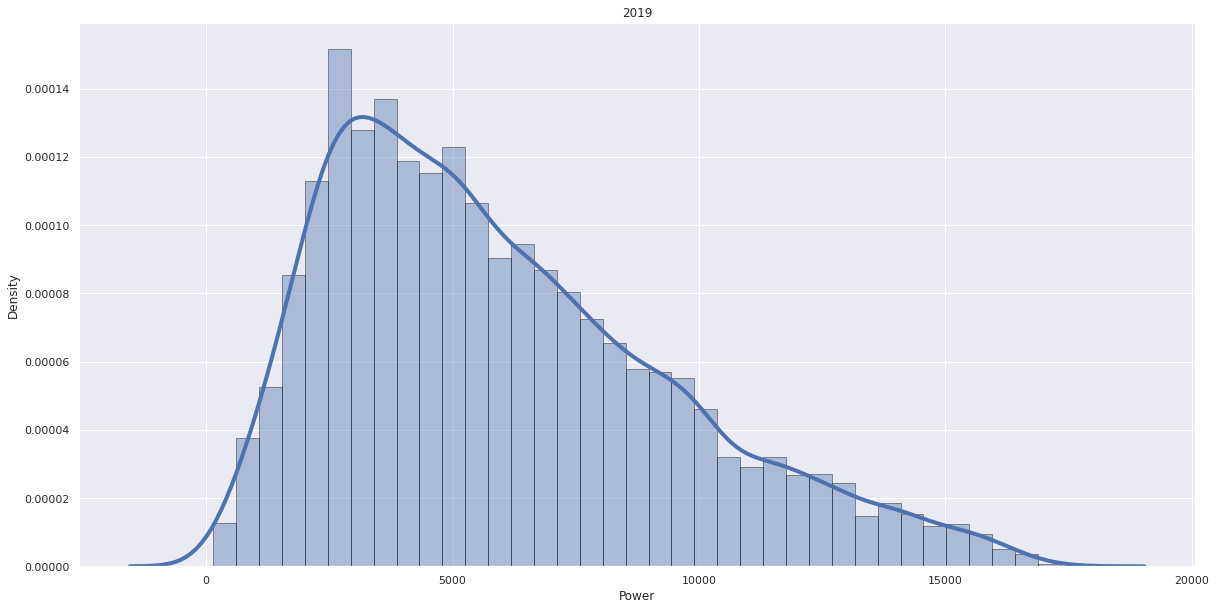

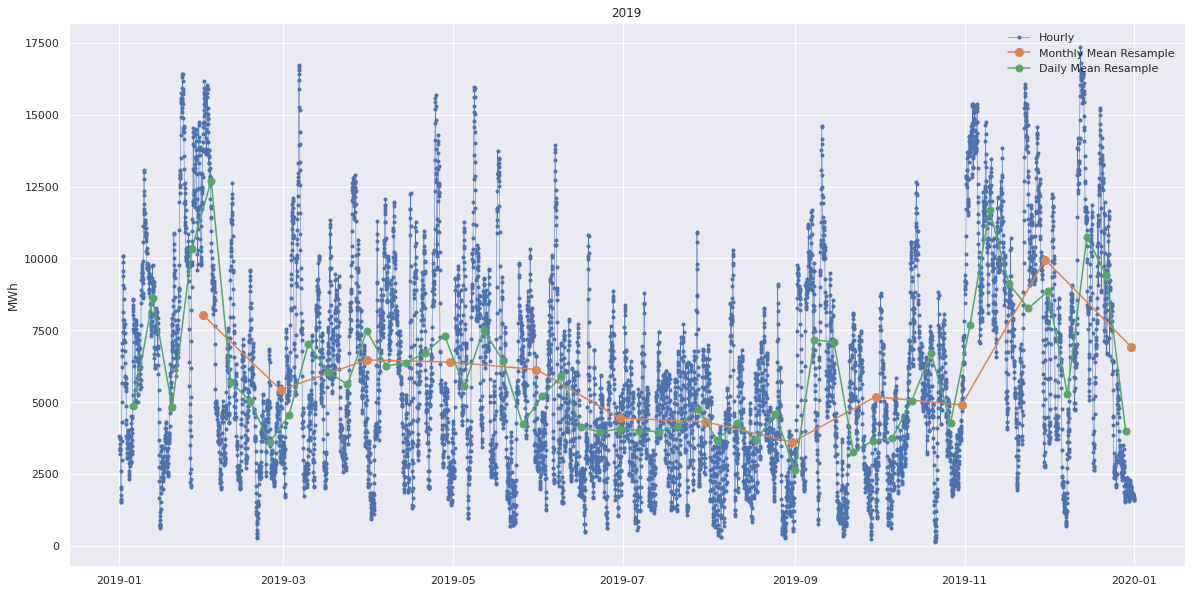

 2020  Skewness Measure:  0.7509225485581744
 2020  Kurtosis Measure:  -0.04617202164105505


Text(0.5, 1.0, '2020')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, '2020')

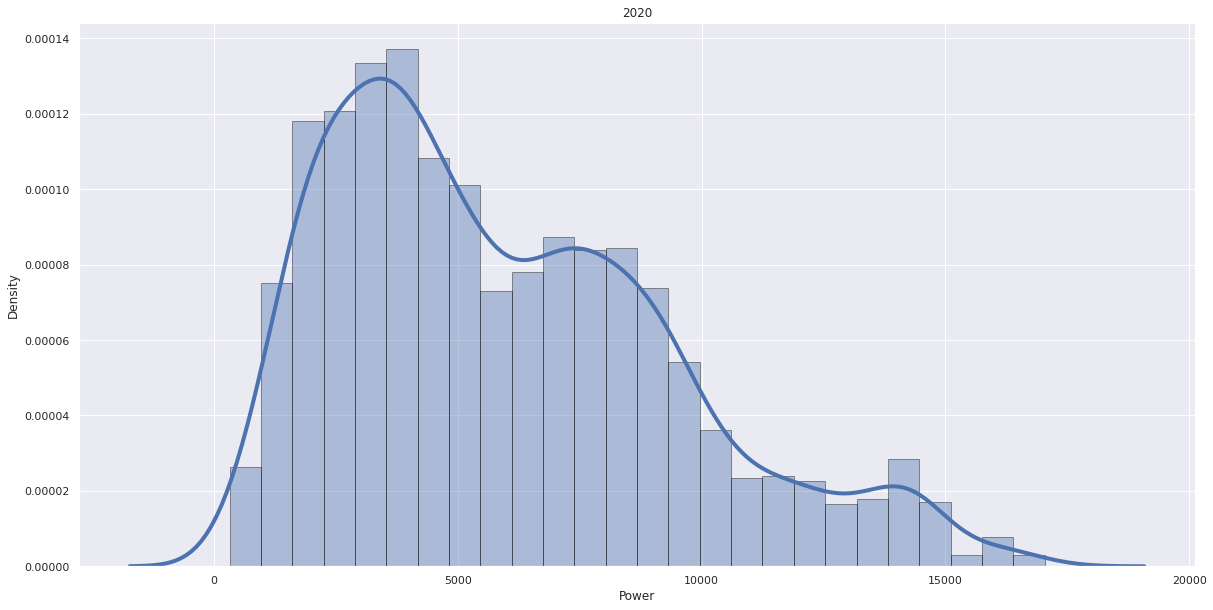

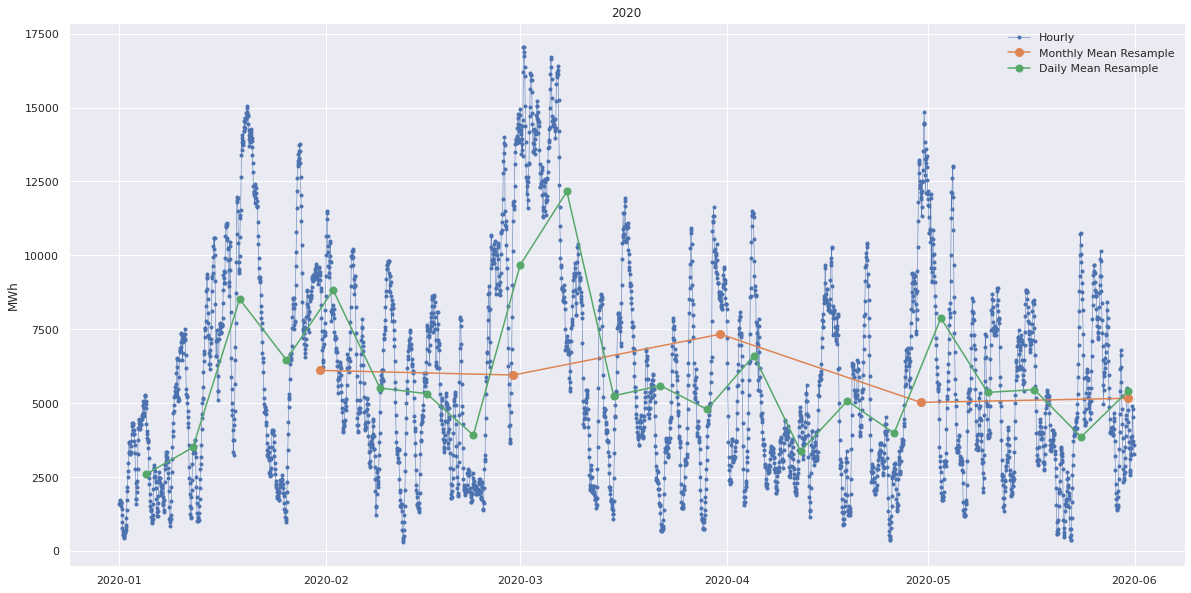

In [13]:
        ###### Hourly generation by year with weekly & monthly means ######
        ###### density & hist, skewness & Kurtosis   ######
sns.set(rc={'figure.figsize':(20,10)})
years=ts_df.index.year.unique()
for i in range(len(years)):
    print('\033[1m', years[i], ' Skewness Measure: ', skew(ts_df.loc[ts_df.index.year==years[i],'Power'], bias=False))
    #ts_df.skew()
    print('\033[1m', years[i],' Kurtosis Measure: ', kurtosis(ts_df.loc[ts_df.index.year==years[i],'Power'], bias=False))
    #ts_df.kurt()
    #ts_df.plot(kind='density')
    plt.title(years[i])
    #sns.set_theme();
    sns.distplot(ts_df.loc[ts_df.index.year==years[i],'Power'], hist=True, kde=True, 
             color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    fig, ax=plt.subplots()
    ax.plot(ts_df.loc[ts_df.index.year==years[i], 'Power'], 
            marker='.', linestyle='-', linewidth=0.5, label='Hourly')
    ax.plot(ts_monthly_mean.loc[ts_monthly_mean.index.year==years[i], 'Power'],
            marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
    ax.plot(ts_weekly_mean.loc[ts_weekly_mean.index.year==years[i], 'Power'],
            marker='o', markersize=7, linestyle='-', label='Daily Mean Resample') 
    plt.ylabel('MWh')
    ax.legend(loc='upper right', frameon=False)
    plt.title(years[i])
    plt.show()
    


In [14]:
months=list(ts_df.index.month.unique())
years=list(ts_df.index.year.unique())
#r_months=[0,1,2,3,4,5,6,7,8,9,10,11]
#r_years=[0,1,2,3,4,5,6]

dnn=[]
for yearsi,monthsi in itertools.product(years,months):
    date_month="'{}-{}'".format(yearsi,monthsi)
    df=ts_df.loc[(ts_df.index.year==yearsi)&(ts_df.index.month==monthsi)].describe(include='all')
    df.columns=[date_month]
    df.index.name="Period (yyyy-m)"
    dnn.append(df)
        #dnn
dnn=pd.concat(dnn, axis=1)
pd.set_option('display.max_rows', None)
display(dnn.transpose().dropna())

    # PENDING
# Add a col. with the aggregated totals generated by month

Period (yyyy-m)  count          mean  ...          75%        max
'2014-1'         744.0   8905.819897  ...  11213.25000  16525.500
'2014-2'         672.0   8889.603926  ...  11220.45850  16176.000
'2014-3'         744.0   6904.564516  ...   9716.79175  15869.667
'2014-4'         720.0   5565.958804  ...   7562.91700  14169.667
'2014-5'         744.0   5599.973335  ...   7916.29175  15519.333
'2014-6'         720.0   4559.314817  ...   5936.37475  14122.000
'2014-7'         744.0   4912.788306  ...   6411.83350  10747.833
'2014-8'         744.0   3884.544129  ...   5062.29150   9681.500
'2014-9'         720.0   2970.682868  ...   3805.37525  12530.333
'2014-10'        744.0   4534.439749  ...   6313.99975  11056.167
'2014-11'        720.0   7116.139346  ...  10081.62525  15063.500
'2014-12'        744.0   6487.279136  ...   9023.08300  15116.833
'2015-1'         744.0   6663.360645  ...   8860.20825  17435.833
'2015-2'         672.0   8975.529024  ...  11686.20800  16044.500
'2015-3'         744.0   6599.741040  ...   9042.62500  15356.500
'2015-4'         720.0   5481.156944  ...   7494.95850  11678.500
'2015-5'         744.0   6453.129246  ...   8371.83325  13469.167
'2015-6'         720.0   4013.940756  ...   5222.04200   9278.833
'2015-7'         744.0   4143.535651  ...   5312.95850  10821.000
'2015-8'         744.0   4359.750445  ...   5842.12475  12052.500
'2015-9'         720.0   4167.616436  ...   5206.20850  14552.333
'2015-10'        744.0   5248.874763  ...   7078.79150  14448.000
'2015-11'        720.0   5147.894665  ...   6911.54150  15828.500
'2015-12'        744.0   4740.743052  ...   6224.20825  12660.500
'2016-1'         744.0   7594.104628  ...  10802.58300  17343.167
'2016-2'         696.0   8742.308428  ...  12666.20825  16013.833
'2016-3'         744.0   7319.363571  ...   9635.16700  16312.167
'2016-4'         720.0   6205.560626  ...   8374.58325  12537.500
'2016-5'         744.0   5283.045914  ...   6704.91700  11149.333
'2016-6'         720.0   4509.172919  ...   5997.45800  12253.333
'2016-7'         744.0   4686.663987  ...   6168.49975   9687.167
'2016-8'         744.0   4881.942206  ...   6200.20800  12502.000
'2016-9'         720.0   3714.919668  ...   5151.20825  10272.667
'2016-10'        744.0   3202.739710  ...   4204.41675  10669.167
'2016-11'        720.0   5364.750933  ...   7606.12525  14647.667
'2016-12'        744.0   3630.403894  ...   5266.74975   9278.000
'2017-1'         744.0   6424.910156  ...   8166.41650  13967.667
'2017-2'         672.0   7230.248510  ...  10874.33325  14630.167
'2017-3'         744.0   6334.098114  ...   8629.95850  14516.000
'2017-4'         720.0   5731.010179  ...   8049.54175  13383.333
'2017-5'         744.0   4618.920699  ...   5956.95850  14119.167
'2017-6'         720.0   4368.640732  ...   5452.95850  15576.667
'2017-7'         744.0   4447.377013  ...   5919.20850  11268.167
'2017-8'         744.0   4386.984526  ...   5675.04175   9972.000
'2017-9'         720.0   3877.681693  ...   5163.37475  11125.000
'2017-10'        744.0   4177.182547  ...   5777.29150   9582.667
'2017-11'        720.0   5387.230785  ...   7363.41675  12785.333
'2017-12'        744.0   7708.323028  ...  10636.79150  14869.667
'2018-1'         744.0   7105.748199  ...  10168.75000  14563.167
'2018-2'         672.0   6935.917140  ...   9032.29175  13225.167
'2018-3'         744.0  10343.291450  ...  12600.37475  16040.167
'2018-4'         720.0   6139.511794  ...   8277.87475  14361.333
'2018-5'         744.0   4366.950483  ...   6185.25000  12874.333
'2018-6'         720.0   3582.730332  ...   4500.29175   8927.000
'2018-7'         744.0   3340.067653  ...   4383.04175   9119.667
'2018-8'         744.0   4105.698919  ...   5463.54150   9671.500
'2018-9'         720.0   3315.827104  ...   4265.70850   9893.667
'2018-10'        744.0   5730.431220  ...   7893.54150  13507.500
'2018-11'        720.0   6284.721986  ...   7794.45850  13044.167
'2018-12'        744.0   5801.725585  ..

In [15]:
months=list(ts_df.index.month.unique())

tes=[]
for monthsi in months:
    d_month=monthsi
    df=ts_df.loc[(ts_df.index.month==monthsi)].sum()
    df.columns=[d_month]
    df.index.name="Month"
    tes.append(df)

tes=pd.concat(tes, axis=1)
pd.set_option('display.max_rows', None)
tes=(tes.transpose().dropna())
tes.to_csv(r'DataMonthlyTotals.csv',index=False, header=True)

sk_df=[]
kr_df=[]
for i in range(len(months)):
    
    skewn=skew(ts_df.loc[ts_df.index.month==months[i],'Power'], bias=False)
    sk_df.append(skewn)
    kr=kurtosis(ts_df.loc[ts_df.index.month==months[i],'Power'], bias=False)
    kr_df.append(kr)
    

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

[Text(0, 0.5, 'MWh')]

Text(0.5, 1.0, 'Wind Power Distribution by Month')

Month   count         mean          std  ...        50%          75%        max
1      5208.0  7262.298763  3727.318125  ...  7086.2500   9898.12500  17435.833
2      4752.0  7448.483830  3754.992197  ...  7135.8335  10533.87525  16176.000
3      5208.0  7328.579143  3678.418399  ...  7244.5830   9847.54150  17033.833
4      5040.0  5791.537430  3037.592255  ...  5365.3335   8006.95850  15686.667
5      5207.0  5373.886107  2818.406429  ...  4981.5000   7410.91650  15952.667
6      4320.0  4246.526548  2340.899221  ...  3811.6665   5528.87475  15576.667
7      4464.0  4306.480815  1960.887359  ...  4158.4165   5591.20850  11268.167
8      4464.0  4203.300994  2101.572728  ...  3890.0000   5524.66650  12502.000
9      4320.0  3872.112226  2485.501177  ...  3305.5000   5180.45850  14592.833
10     4464.0  4632.405276  2653.912680  ...  4130.4165   6482.66650  14448.000
11     4320.0  6543.352816  3637.149033  ...  6121.8330   9202.04150  16071.333
12     4464.0  5881.097899  3456.981746  ...  5379.6665   8025.08300  17345.500

[12 rows x 8 columns]

([<matplotlib.axis.XTick at 0x7fdb2faf9710>,
 [Text(0.5, 1, 'Jan'),
  Text(1.5, 1, 'Feb'),
  Text(2.5, 1, 'Mar'),
  Text(3.5, 1, 'Apr'),
  Text(4.5, 1, 'May'),
  Text(5.5, 1, 'Jun'),
  Text(6.5, 1, 'Jul'),
  Text(7.5, 1, 'Aug'),
  Text(8.5, 1, 'Sep'),
  Text(9.5, 1, 'Oct'),
  Text(10.5, 1, 'Nov'),
  Text(11.5, 1, 'Dec')])

Text(0.5, 56.5, '')

Text(146.5, 0.5, '')

Text(0.0, 1.0, 'MONTHLY VS. ANNUAL WIND POWER AVERAGES')

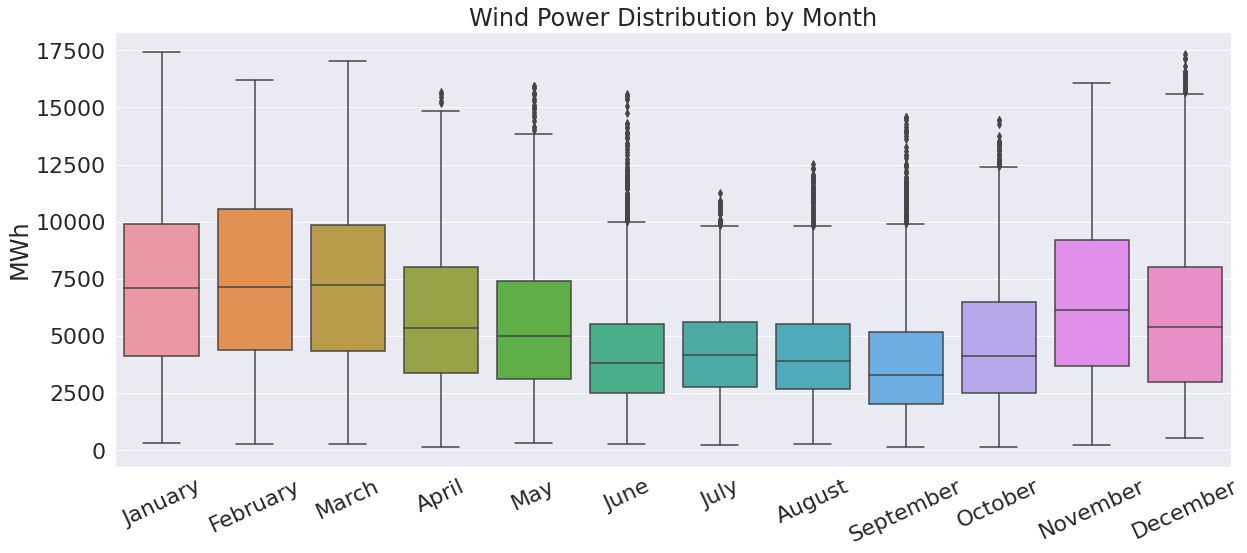

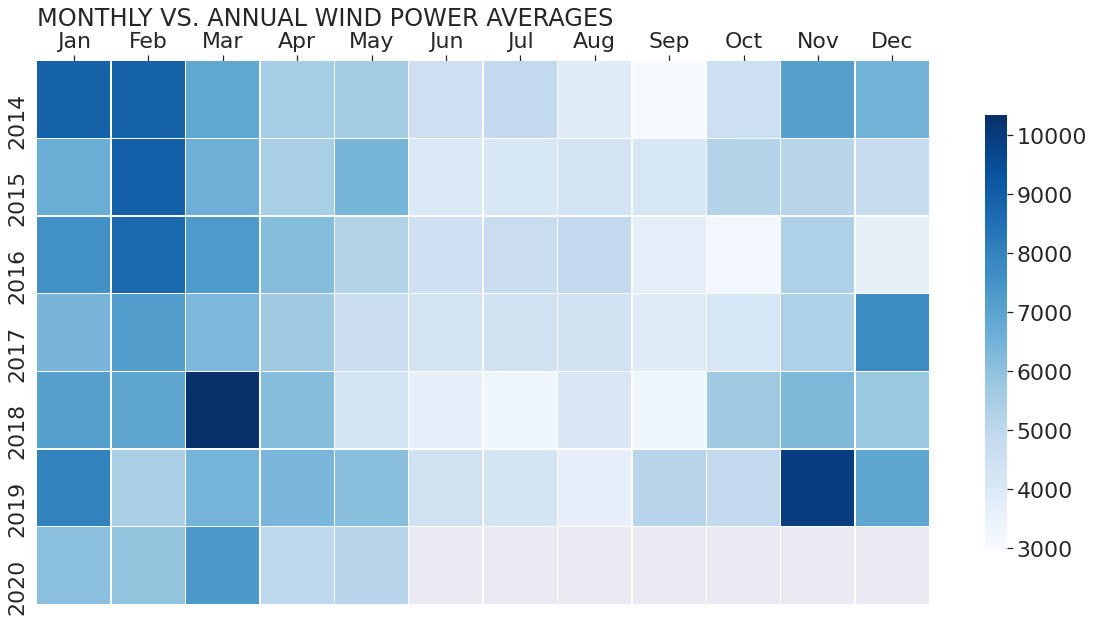

In [16]:
                    ################# Distribution by month ###################
sns.set(rc={'figure.figsize':(20,8)}, font_scale = 2)
plt.xticks(rotation=25)
sns.boxplot(x=ts_df.index.month_name(), y=ts_df["Power"]).set(ylabel='MWh')
plt.title("Wind Power Distribution by Month")
                    ##### Descriptive Stats #####

months=list(ts_df.index.month.unique())
dnn=[]
for monthsi in months:
    d_month=monthsi
    df=ts_df.loc[(ts_df.index.month==monthsi)].describe(include='all')
    df.columns=[d_month]
    df.index.name="Month"
    dnn.append(df)
        #dnn
dnn=pd.concat(dnn, axis=1)
pd.set_option('display.max_rows', None)
display(dnn.transpose().dropna())
dnn_tosave=(dnn.transpose().dropna())

dnn_tosave.to_csv(r'DataMonthlySummary.csv',index=False, header=True)

ts_month_sum=ts_df['Power'].resample('M').sum()
ts_monthly_sum= ts_month_median.to_frame(name="Power")

                        ##### Heat Map ####
                    #### Years vs. Months####

# create a copy of the dataframe, and add columns for month and year
df_m=ts_df.copy()
df_m = ts_df.copy()
df_m['Month'] = df_m.index.month
df_m['Year'] = df_m.index.year

# group by month and year, get the average
df_m = df_m.groupby(['Month', 'Year']).mean()
#df_m
#unstcak indices
df_m=df_m.unstack(level=0)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_m, cmap="Blues", 
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Monthly vs. Annual Wind Power Averages'.upper()
plt.title(title, loc='left')
plt.show()

[Text(0, 0.5, 'MWh')]

([<matplotlib.axis.XTick at 0x7fdb276b7588>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

Text(0.5, 1.0, 'Distribution by Day of the Week')

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Weekly Generation (Running Totals)')

([<matplotlib.axis.XTick at 0x7fdb2fd607b8>,
 [Text(0.5, 1, '0'),
  Text(1.5, 1, '1'),
  Text(2.5, 1, '2'),
  Text(3.5, 1, '3'),
  Text(4.5, 1, '4'),
  Text(5.5, 1, '5'),
  Text(6.5, 1, '6'),
  Text(7.5, 1, '7'),
  Text(8.5, 1, '8'),
  Text(9.5, 1, '9'),
  Text(10.5, 1, '10'),
  Text(11.5, 1, '11'),
  Text(12.5, 1, '12'),
  Text(13.5, 1, '13'),
  Text(14.5, 1, '14'),
  Text(15.5, 1, '15'),
  Text(16.5, 1, '16'),
  Text(17.5, 1, '17'),
  Text(18.5, 1, '18'),
  Text(19.5, 1, '19'),
  Text(20.5, 1, '20'),
  Text(21.5, 1, '21'),
  Text(22.5, 1, '22'),
  Text(23.5, 1, '23')])

([<matplotlib.axis.YTick at 0x7fdb2fb369e8>,
 [Text(0, 0.5, 'Monday'),
  Text(0, 1.5, 'Tuesday'),
  Text(0, 2.5, 'Wednesday'),
  Text(0, 3.5, 'Thursday'),
  Text(0, 4.5, 'Friday'),
  Text(0, 5.5, 'Saturday'),
  Text(0, 6.5, 'Sunday')])

Text(0.5, 57.5, '')

Text(75.5, 0.5, '')

Text(0.0, 1.0, 'HOURLY VS. WEEKLY WIND POWER AVERAGES')

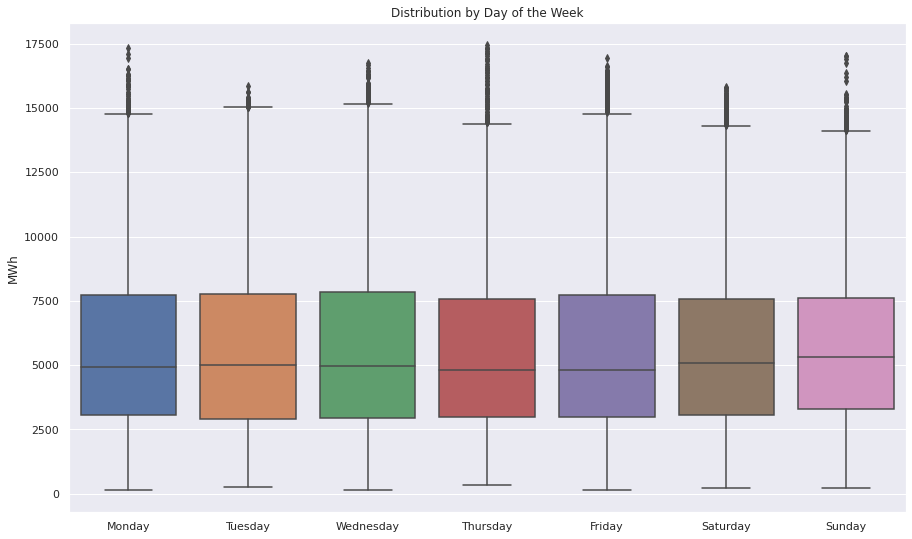

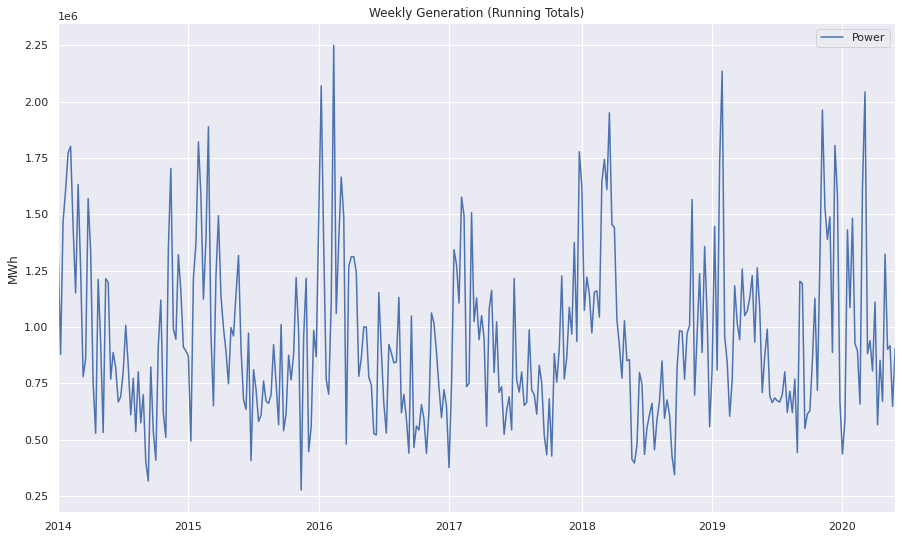

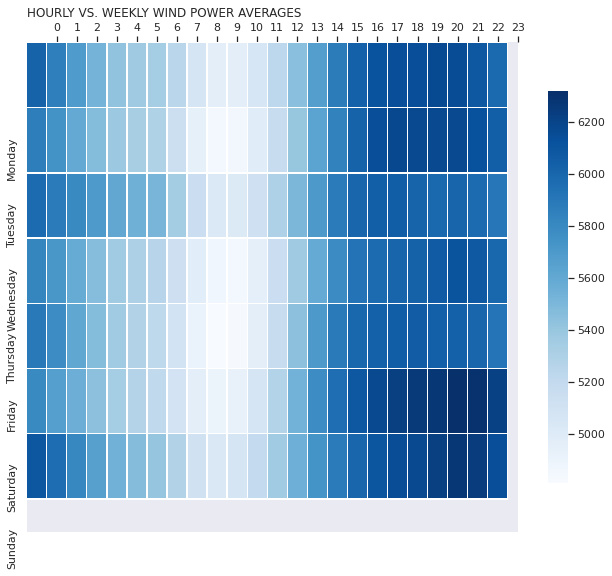

In [18]:
######################### Distribution by day of the week ########################
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(x=ts_df.index.weekday, y=ts_df["Power"]).set(ylabel='MWh')
xticks_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                'Sunday']
plt.xticks([0,1,2,3,4,5,6],xticks_labels)
plt.title("Distribution by Day of the Week")

ts_week_sum=ts_df['Power'].resample('W').sum()
ts_weekly_sum= ts_week_sum.to_frame(name="Power")
ts_hour_mean=ts_df['Power'].resample('h').mean()
ts_hourly_mean=ts_hour_mean.to_frame(name="Power")

#fig, ax=plt.subplots()
#ax.plot(ts_weekly_sum['Power'],marker='.', markersize=8, linestyle='-', label='Weekly Running Totals')
#ax.plot(ts_hourly_mean['Power'],marker='o', markersize=3, linestyle='-', label='Daily Mean')
#ax.set_ylabel('MWh')
ts_weekly_sum.plot()
plt.ylabel('MWh')
plt.title("Weekly Generation (Running Totals)")



                        ##### Heat Map ####
                    ##### Hourly vs. Weekday #####

    # create a copy of the dataframe, and add columns for month and year
df_m=ts_df.copy()
df_m = ts_df.copy()
df_m['Hour'] = df_m.index.hour
df_m['Weekday'] = df_m.index.weekday

    # group by month and year, get the average
df_m = df_m.groupby(['Hour', 'Weekday']).mean()

    #unstcak indices
df_m=df_m.unstack(level=0)

pd.set_option('display.max_columns', None)
#display(df_m.T())

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m, cmap="Blues", 
           linewidth=0.3, cbar_kws={"shrink": .8})

    # xticks
ax.xaxis.tick_top()
xticks_labels = list(range(0,24))
yticks_labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
              'Saturday', 'Sunday']
plt.xticks(np.arange(24) + 1.5, labels=xticks_labels)
plt.yticks(np.arange(7)+1.5, labels=yticks_labels)
    # axis labels
plt.xlabel('')
plt.ylabel('')

    # title
title = 'Hourly vs. Weekly Wind Power Averages'.upper()
plt.title(title, loc='left')
plt.show()

[Text(0, 0.5, 'MWh'), Text(0.5, 0, 'Hour')]

Text(0.5, 1.0, 'Distribution by Hour of the Day')

Month        Power                                                      \
Month           1            2            3            4            5    
Hour                                                                     
0      7408.738848  7506.283662  7518.379429  5851.936495  5720.792622   
1      7373.090636  7402.473076  7401.181276  5739.680962  5544.441636   
2      7270.543742  7270.291242  7268.423922  5628.468290  5370.132876   
3      7133.129037  7174.943591  7176.493848  5506.032543  5205.017636   
4      7074.824115  7127.347636  7093.514594  5435.288071  5062.241959   
5      7086.071456  7119.705384  7048.237336  5393.489667  4970.562230   
6      7158.452346  7191.262621  7036.163622  5351.783338  4868.521484   
7      7187.092889  7293.671732  6996.271129  5205.782562  4581.514618   
8      7180.456954  7299.346798  6803.268806  4984.861900  4370.658991   
9      7073.228876  7138.951182  6637.033811  5023.980143  4424.318728   
10     6873.046055  7067.672535  6769.517673  5239.977786  4554.502300   
11     6858.682793  7209.629631  6981.909359  5461.337281  4731.514581   
12     7037.218899  7403.508409  7187.619051  5676.130148  4933.690475   
13     7246.933935  7592.180975  7401.976949  5905.473019  5177.483074   
14     7409.910143  7718.287864  7585.696613  6128.103167  5447.569876   
15     7416.814166  7807.870394  7753.817230  6340.551552  5719.055295   
16     7346.884793  7813.338364  7837.427797  6509.500786  5995.377862   
17     7232.193530  7688.934323  7831.566028  6607.505529  6187.625175   
18     7287.985401  7497.102682  7648.414756  6518.540462  6242.706613   
19     7454.204281  7580.301338  7497.804138  6246.205557  6112.911673   
20     7538.494585  7715.526944  7599.577590  6161.972214  5986.818719   
21     7554.605995  7770.066525  7648.675889  6112.706362  6005.923166   
22     7553.145926  7736.705409  7619.503083  6034.307967  5955.217309   
23     7539.420908  7638.209591  7543.425507  5933.282529  5806.662037   

Month                                                                   \
Month           6            7            8            9            10   
Hour                                                                     
0      4661.469444  4979.392452  4884.658618  4266.116667  4886.293914   
1      4429.811128  4737.317204  4649.426505  4116.919461  4839.563591   
2      4214.480550  4507.334204  4405.895183  3977.617600  4781.485522   
3      4009.785189  4288.353027  4179.793919  3828.633317  4723.955199   
4      3856.267589  4077.399656  3995.377231  3713.221322  4676.770624   
5      3741.504622  3915.230296  3837.750876  3613.125006  4645.277790   
6      3576.381500  3720.443543  3710.846774  3533.347228  4609.928301   
7      3206.101822  3342.473989  3429.473140  3402.770372  4553.307323   
8      2981.538894  3001.855742  3053.235640  3113.169439  4384.359301   
9      2999.340789  2884.968667  2905.334210  2978.381472  4159.327091   
10     3131.919422  2894.498183  2877.441737  3014.411106  4146.977602   
11     3335.001856  3055.571699  2977.746414  3103.895378  4242.018833   
12     3625.650911  3317.436392  3190.309118  3267.474039  4354.781376   
13     3967.461094  3682.122780  3482.925634  3496.116672  4478.544801   
14     4331.884267  4103.589618  3836.560946  3773.436117  4589.107495   
15     4687.174050  4506.819016  4236.156796  4063.899072  4668.419349   
16     5013.193522  4884.530489  4641.746398  4329.603678  4719.517914   
17     5274.931489  5207.958774  5011.476683  4522.996272  4675.375468   
18     5417.613922  5406.912210  5270.896081  4538.684267  4614.152355   
19     5333.024072  5479.671134  5337.499984  4463.937028  4755.785849   
20     5124.786122  5383.241968  5332.755387  4506.899072  4881.940887   
21     5081.987989  5413.750935  5329.524145  4521.613883  4929.974919   
22     5031.439883  5356.674742  5232.552844  4457.305550  4938.491022   
23     4883.887022  5207.992849  5069.839597  4327.119411  4922.370086   

Mo

([<matplotlib.axis.XTick at 0x7fdb2fa6f518>,
 [Text(0.5, 1, 'Jan'),
  Text(1.5, 1, 'Feb'),
  Text(2.5, 1, 'Mar'),
  Text(3.5, 1, 'Apr'),
  Text(4.5, 1, 'May'),
  Text(5.5, 1, 'Jun'),
  Text(6.5, 1, 'Jul'),
  Text(7.5, 1, 'Aug'),
  Text(8.5, 1, 'Sep'),
  Text(9.5, 1, 'Oct'),
  Text(10.5, 1, 'Nov'),
  Text(11.5, 1, 'Dec')])

Text(0.5, 57.5, '')

Text(75.5, 0.5, '')

Text(0.0, 1.0, 'MONTHLY VS. HOURLY WIND POWER AVERAGES')

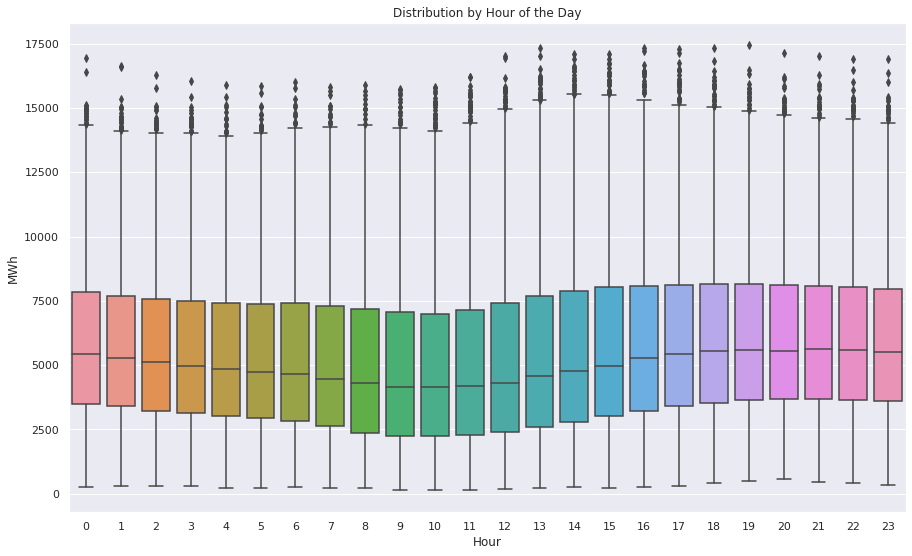

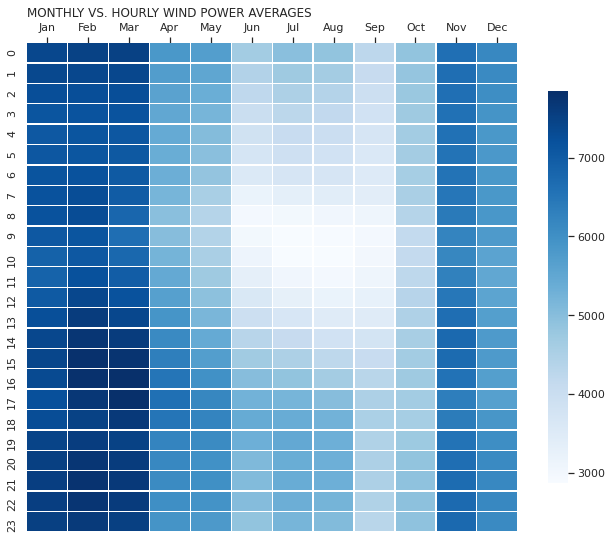

In [19]:
#################### Distribution by hour #########################
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(x=ts_df.index.hour, y=ts_df["Power"]).set(ylabel='MWh', xlabel='Hour')
plt.title("Distribution by Hour of the Day")

# create a copy of the dataframe, and add columns for month and year
df_m=ts_df.copy()
df_m = ts_df.copy()
df_m['Month'] = df_m.index.month
df_m['Hour'] = df_m.index.hour

# group by month and year, get the average
df_m = df_m.groupby(['Month', 'Hour']).mean()
#df_m
#unstcak indices
df_m=df_m.unstack(level=0)

pd.set_option('display.max_columns', None)
display(df_m)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m, cmap="Blues", 
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Monthly vs. Hourly Wind Power Averages'.upper()
plt.title(title, loc='left')
plt.show()

Month          Power                                                      \
WeekDay            0            1            2            3            4   
Hour                                                                       
0        6022.266958  5867.307401  5979.135824  5826.701469  5895.463693   
1        5862.546392  5746.503533  5886.385078  5721.785582  5779.875618   
2        5689.937620  5599.024964  5797.398507  5588.764675  5616.231818   
3        5525.109787  5474.766449  5696.358719  5462.387552  5475.358716   
4        5429.710084  5386.439623  5610.172128  5363.962215  5368.346278   
5        5372.259985  5334.701090  5551.326893  5310.625863  5284.856239   
6        5343.275949  5290.260488  5513.144290  5260.000000  5223.889057   
7        5241.810907  5141.607787  5350.458215  5135.595499  5096.172645   
8        5066.892210  4946.720039  5152.278110  4978.891051  4917.552218   
9        4965.408189  4847.877734  5025.826388  4868.304006  4811.867669   
10       4963.388216  4859.529940  5014.261696  4853.042269  4830.048743   
11       5061.772970  4983.248503  5124.018412  4957.942251  4964.845746   
12       5230.448123  5177.870260  5297.859185  5153.018890  5182.635322   
13       5449.241509  5405.375243  5501.738800  5373.846770  5444.581072   
14       5674.327326  5636.570862  5704.454203  5591.312973  5700.748743   
15       5877.504458  5842.437120  5888.834833  5786.590057  5890.718433   
16       6035.191602  6021.823347  6004.753707  5926.580113  6000.201475   
17       6121.010443  6142.467054  6046.112925  5979.611421  6030.573131   
18       6143.752012  6182.463090  6048.807451  6011.023388  6052.652761   
19       6145.211569  6173.443096  6017.018907  6029.582588  6059.690063   
20       6165.841323  6172.081841  5994.888564  6069.071657  6038.190543   
21       6157.780949  6175.814356  6009.280591  6107.358185  6034.277116   
22       6085.249024  6129.893701  5981.292027  6081.422367  6002.434334   
23       5986.331329  6045.343323  5911.097513  6000.294522  5918.450731   

Month                              
WeekDay            5            6  
Hour                               
0        5797.845752  6091.988540  
1        5668.194021  5959.601003  
2        5560.131848  5817.430758  
3        5443.987561  5657.482072  
4        5341.902970  5542.641809  
5        5274.421904  5469.980093  
6        5212.484072  5410.571621  
7        5094.043773  5283.082078  
8        4961.418904  5117.362161  
9        4899.796994  5033.748767  
10       4927.321379  5074.492030  
11       5065.637818  5195.362693  
12       5280.668675  5362.903457  
13       5541.138806  5557.720901  
14       5777.230349  5741.432836  
15       5958.420919  5885.523875  
16       6083.883570  6004.348248  
17       6172.209439  6099.248749  
18       6227.481122  6148.573627  
19       6259.798018  6174.684579  
20       6277.224863  6228.094036  
21       6318.612946  6272.059722  
22       6304.076624  6245.077143  
23       6213.319919  6143.760979

([<matplotlib.axis.XTick at 0x7fdb2fa10b00>,
 [Text(0.5, 1, 'Mon'),
  Text(1.5, 1, 'Tue'),
  Text(2.5, 1, 'Wed'),
  Text(3.5, 1, 'Thu'),
  Text(4.5, 1, 'Fri'),
  Text(5.5, 1, 'Sat'),
  Text(6.5, 1, 'Sun')])

Text(0.5, 66.5, '')

Text(138.5, 0.5, '')

Text(0.0, 1.0, 'WEEK DAY VS. HOURLY WIND POWER AVERAGES')

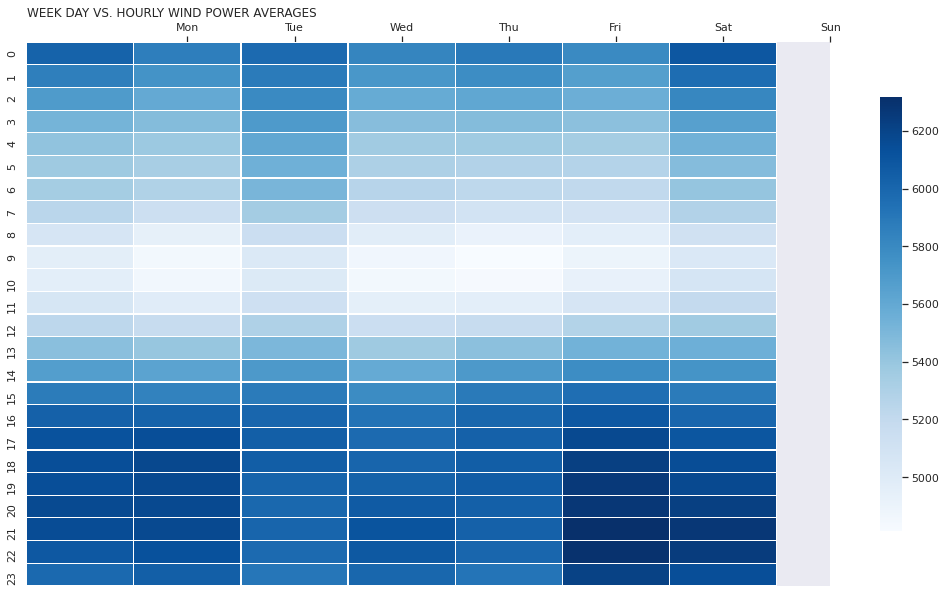

In [20]:
# create a copy of the dataframe, and add columns for month and year
df_m=ts_df.copy()
df_m = ts_df.copy()
df_m['WeekDay'] = df_m.index.weekday
df_m['Hour'] = df_m.index.hour

# group by month and year, get the average
df_m = df_m.groupby(['WeekDay', 'Hour']).mean()
#df_m
#unstcak indices
df_m=df_m.unstack(level=0)

pd.set_option('display.max_columns', None)
display(df_m)

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_m, cmap="Blues", 
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
                'Sun']
plt.xticks(np.arange(7) + 1.5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Week Day vs. Hourly Wind Power Averages'.upper()
plt.title(title, loc='left')
plt.show()